# CUSTOMER SUPPORT DATA


## INTRODUCTION

### Project Overview 
#### In the current business environment, great customer service is crucial for creating brand loyalty and keeping customers happy. This project looks at Customer Support Data gathered from various service interactions through different channels. The dataset provides important information about how well customer support works, how agents perform, and how satisfied customers are.

### Objective
####   This Data Analysis project seeks to find patterns, connections, and possible issues that affect customer experience. By using these insights, companies can make informed choices to improve their support services, speed up response times, and increase customer satisfaction.

#### first we have to import all the libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


#### import the dataframes using read_csv() function and print the dataframe using .to_sting () function

In [2]:
df = pd.read_csv("E:\DATAANALYTICS\DATA SET\Customer_support_data.csv")
#print (df.to_string())


#### print first 10 rows and last 10 rows 

In [3]:
print(df.head(10))
print(df.tail(10))

                              Unique id channel_name           category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall    Product Queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall    Product Queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      Inbound      Order Related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound            Returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      Inbound       Cancellation   
5  1cfde5b9-6112-44fc-8f3b-892196137a62        Email            Returns   
6  11a3ffd8-1d6b-4806-b198-c60b5934c9bc      Outcall    Product Queries   
7  372b51a5-fa19-4a31-a4b8-a21de117d75e      Inbound            Returns   
8  6e4413db-4e16-42fc-ac92-2f402e3df03c      Inbound            Returns   
9  b0a65350-64a5-4603-8b9a-a24a4a145d08      Inbound  Shopzilla Related   

                   Sub-category  \
0                Life Insurance   
1  Product Specific Information   
2             Installation/demo   
3        Reverse Pickup Enquiry   

#### check the info of the data frame 

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [5]:
columns_to_drop =["connected_handling_time"]
df = df.drop(columns = columns_to_drop,axis=1)

#### to drop all null values in the data frame

In [6]:
df.dropna(inplace=True)

#### to check the total null cells in the dataframe

In [7]:
print(df.isna().sum())

Unique id               0
channel_name            0
category                0
Sub-category            0
Customer Remarks        0
Order_id                0
order_date_time         0
Issue_reported at       0
issue_responded         0
Survey_response_Date    0
Customer_City           0
Product_category        0
Item_price              0
Agent_name              0
Supervisor              0
Manager                 0
Tenure Bucket           0
Agent Shift             0
CSAT Score              0
dtype: int64


#### fill all the whitespaces using under score

In [8]:
df = df.rename(columns={'Unique id' : 'Unique_id','Customer Remarks' : "Customer_Remarks", "Agent Shift" : "Agent_Shift","CSAT Score" : "CSAT_Score","Issue_reported at" : "Issue_reported_at","Tenure Bucket" : "Tenure_Bucket"})

#### changing data types of the column 

In [9]:
df["Agent_Shift"] = df["Agent_Shift"].astype("string")
df["Unique_id"] = df["Unique_id"].astype("string")
df["channel_name"] = df["channel_name"].astype("string")
df["category"] = df["category"].astype("string")
df["Order_id"] = df["Order_id"].astype("string")
df["Sub-category"] = df["Sub-category"].astype("string")
df["Customer_Remarks"] = df["Customer_Remarks"].astype("string")
df["order_date_time"] = df["order_date_time"].astype("datetime64[ns]")
df["Issue_reported_at"] = df["Issue_reported_at"].astype("datetime64[ns]")
df["issue_responded"] = df["issue_responded"].astype("datetime64[ns]")
df["Survey_response_Date"] = df["Survey_response_Date"].astype("datetime64[ns]")
df["Customer_City"] = df["Customer_City"].astype("string")
df["Product_category"] = df["Product_category"].astype("string")
df["Agent_name"] = df["Agent_name"].astype("string")
df["Supervisor"] = df["Supervisor"].astype("string")
df["Manager"] = df["Manager"].astype("string")
df["Agent_Shift"] = df["Agent_Shift"].astype("string")

# Define logical order for Tenure_Bucket ranges
tenure_bucket_order = ["On Job Training", "0-30", "31-60", "61-90", ">90"]
# Convert Tenure_Bucket to a categorical data type with specified order
df["Tenure_Bucket"] = pd.Categorical(df["Tenure_Bucket"], categories=tenure_bucket_order, ordered=True)

df["Item_price"] = df['Item_price'].round().astype('Int64')



In [10]:
# Preprocessing the dataset

# Convert date columns to datetime format
date_columns = ["order_date_time", "Issue_reported_at", "Survey_response_Date", "issue_responded"]
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Check for missing values and fill/drop where appropriate
missing_summary = df.isnull().sum()

# Adding derived columns (e.g., response time, issue duration)
df["response_time"] = (df["issue_responded"] - df["Issue_reported_at"]).dt.total_seconds()
df["survey_delay"] = (df["Survey_response_Date"] - df["Issue_reported_at"]).dt.days

# Convert categorical data to categories
categorical_columns = ["channel_name", "category", "Sub-category", "Tenure_Bucket", "Agent_Shift"]
for col in categorical_columns:
    df[col] = df[col].astype("category")

# Replace missing item prices with the median
df["Item_price"] = df["Item_price"].fillna(df["Item_price"].median())

# Generate a summary of the cleaned data
df.info(), missing_summary

<class 'pandas.core.frame.DataFrame'>
Index: 5784 entries, 11 to 85881
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unique_id             5784 non-null   string        
 1   channel_name          5784 non-null   category      
 2   category              5784 non-null   category      
 3   Sub-category          5784 non-null   category      
 4   Customer_Remarks      5784 non-null   string        
 5   Order_id              5784 non-null   string        
 6   order_date_time       5784 non-null   datetime64[ns]
 7   Issue_reported_at     5784 non-null   datetime64[ns]
 8   issue_responded       5784 non-null   datetime64[ns]
 9   Survey_response_Date  5784 non-null   datetime64[ns]
 10  Customer_City         5784 non-null   string        
 11  Product_category      5784 non-null   string        
 12  Item_price            5784 non-null   Int64         
 13  Agent_name           

(None,
 Unique_id               0
 channel_name            0
 category                0
 Sub-category            0
 Customer_Remarks        0
 Order_id                0
 order_date_time         0
 Issue_reported_at       0
 issue_responded         0
 Survey_response_Date    0
 Customer_City           0
 Product_category        0
 Item_price              0
 Agent_name              0
 Supervisor              0
 Manager                 0
 Tenure_Bucket           0
 Agent_Shift             0
 CSAT_Score              0
 dtype: int64)

#### plotinting a box plot to find if there is any outlayers in the dataframe

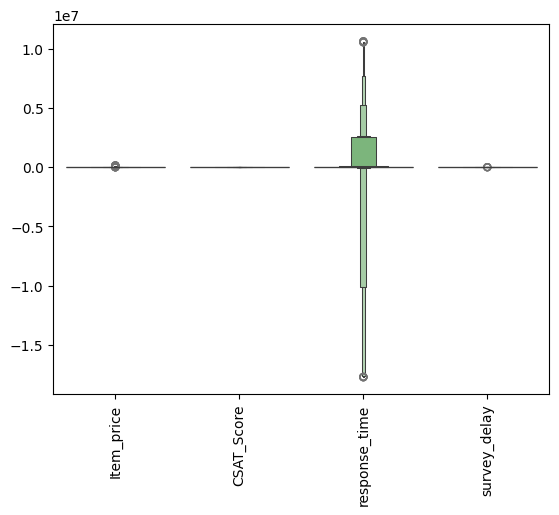

In [11]:
sns.boxenplot(df)
plt.xticks(rotation=90)
plt.show()

### Statistical Analysis

find correlation this corr() method calculates the relationship between each columns in your data set

In [12]:
correlation=df.corr(numeric_only=True)
print(correlation)

               Item_price  CSAT_Score  response_time  survey_delay
Item_price       1.000000   -0.177582      -0.002197      0.038722
CSAT_Score      -0.177582    1.000000      -0.001773     -0.084538
response_time   -0.002197   -0.001773       1.000000      0.121044
survey_delay     0.038722   -0.084538       0.121044      1.000000


<Axes: >

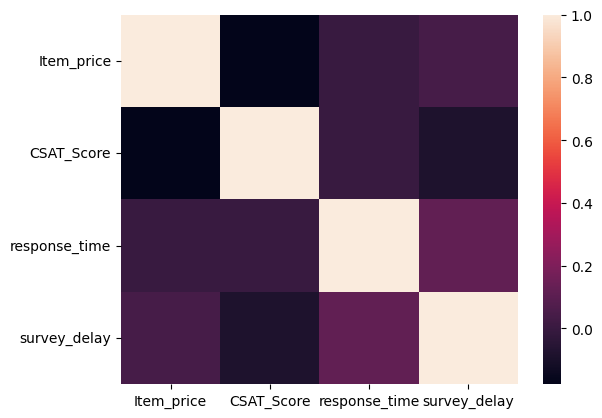

In [13]:
sns.heatmap(data=correlation)

In [14]:
print(df.cov(numeric_only=True))

                 Item_price   CSAT_Score  response_time  survey_delay
Item_price     1.670306e+08 -4018.595520  -6.849035e+07  3.459433e+04
CSAT_Score    -4.018596e+03     3.065875  -7.485399e+03 -1.023247e+01
response_time -6.849035e+07 -7485.398939   5.816584e+12  2.018017e+07
survey_delay   3.459433e+04   -10.232473   2.018017e+07  4.778576e+03


In [15]:
df.describe()

,order_date_time,Issue_reported_at,issue_responded,Survey_response_Date,Item_price,CSAT_Score,response_time,survey_delay
count,5784,5784,5784,5784,5784.0,5784.000000,5.784000e+03,5784.000000
mean,2023-07-02 09:26:11.203319552,2023-08-16 10:16:53.153527040,2023-08-16 07:26:50.923236608,2023-08-15 02:36:20.912862976,5810.067427,3.717669,-1.020223e+04,-1.717324
min,2022-01-07 07:00:00,2023-01-08 00:00:00,2023-01-08 00:01:00,2023-08-01 00:00:00,1.0,1.000000,-1.771188e+07,-119.000000
25%,2023-05-08 21:27:30,2023-08-13 18:00:45,2023-08-14 00:34:15,2023-08-10 00:00:00,399.0,1.000000,1.200000e+02,-1.000000
50%,2023-07-24 21:55:30,2023-08-21 10:27:00,2023-08-21 13:27:00,2023-08-14 00:00:00,999.0,5.000000,4.200000e+02,-1.000000
75%,2023-08-16 00:24:15,2023-08-31 14:44:00,2023-08-31 17:41:00,2023-08-21 00:00:00,2999.0,5.000000,6.180000e+03,0.000000
max,2023-12-08 23:55:00,2023-12-08 23:46:00,2023-12-08 23:52:00,2023-08-31 00:00:00,159990.0,5.000000,1.062360e+07,208.000000
std,NaN,NaN,NaN,NaN,12924.031171,1.750964,2.411760e+06,69.127242


## EDA project Quesions

#### 1. Distribution of Customer Satisfaction (CSAT) Scores

In [16]:
csat_distribution = df["CSAT_Score"].value_counts()
print(csat_distribution)

CSAT_Score
5    3449
1    1578
4     505
3     156
2      96
Name: count, dtype: int64


#### 2. Average response time by channel

In [17]:
avg_response_by_channel = df.groupby("channel_name")["response_time"].mean()
print(avg_response_by_channel)


channel_name
Email      69120.629921
Inbound   -13094.407216
Outcall   -32633.333333
Name: response_time, dtype: float64


C:\Users\saran\AppData\Local\Temp\ipykernel_10696\3159417087.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_response_by_channel = df.groupby("channel_name")["response_time"].mean()


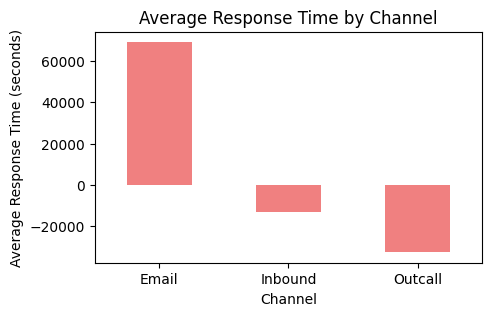

In [18]:
plt.figure(figsize=(5,3))
avg_response_by_channel.plot(kind='bar', color='lightcoral')
plt.title("Average Response Time by Channel")
plt.xlabel("Channel")
plt.ylabel("Average Response Time (seconds)")
plt.xticks(rotation=0)
plt.show()

#### 3. Average item price by category

In [19]:

avg_price_by_category = df.groupby("category")["Item_price"].mean()
print(avg_price_by_category)


category
Cancellation          7704.329588
Feedback              5097.489011
Offers & Cashback     6895.357143
Order Related         8134.825915
Others                3303.166667
Payments related        12693.625
Product Queries           5145.75
Refund Related        6461.310078
Returns               3881.818656
Shopzilla Related    22738.142857
Name: Item_price, dtype: Float64


C:\Users\saran\AppData\Local\Temp\ipykernel_10696\1295103207.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_category = df.groupby("category")["Item_price"].mean()


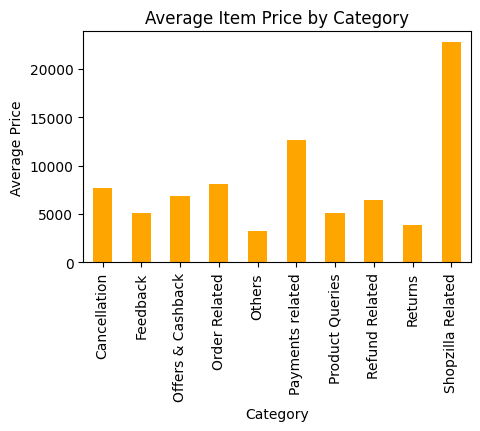

In [20]:
plt.figure(figsize=(5,3))
avg_price_by_category.plot(kind='bar', color='orange')
plt.title("Average Item Price by Category")
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.show()

#### 4. Proportion of issues by category


In [21]:
issue_proportion_by_category = (df["category"].value_counts(normalize=True) * 100).head()
print(issue_proportion_by_category)


category
Returns           49.671508
Order Related     34.958506
Refund Related     6.690871
Cancellation       4.616183
Feedback           3.146611
Name: proportion, dtype: float64


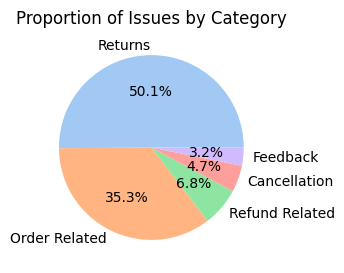

In [22]:
plt.figure(figsize=(5, 3))
issue_proportion_by_category.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Proportion of Issues by Category")
plt.ylabel("")
plt.show()

#### 5. Top 5 most common product categories


In [23]:
top_product_categories = df["Product_category"].value_counts().head(5)
print(top_product_categories)

Product_category
Electronics                    1678
LifeStyle                      1327
Books & General merchandise    1064
Mobile                          614
Home Appliences                 472
Name: count, dtype: Int64


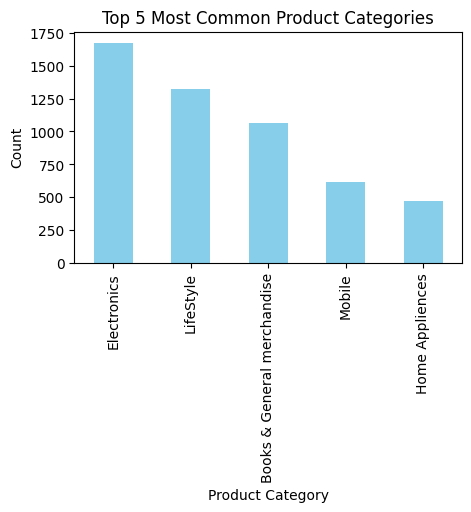

In [24]:
plt.figure(figsize=(5, 3))
top_product_categories.plot(kind='bar', color='skyblue')
plt.title("Top 5 Most Common Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

#### 6. Issues reported by city (top 5 cities)


In [25]:

top_cities_by_issues = df["Customer_City"].value_counts().head(5)
print(top_cities_by_issues)

Customer_City
HYDERABAD    241
NEW DELHI    227
MUMBAI       136
PUNE         119
BANGALORE    106
Name: count, dtype: Int64


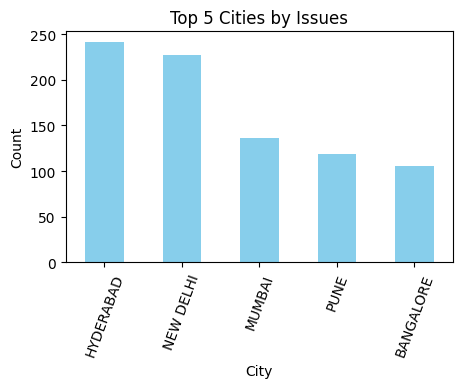

In [26]:
plt.figure(figsize=(5,3))
top_cities_by_issues.plot(kind='bar', color='skyblue')
plt.title("Top 5 Cities by Issues")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=70)
plt.show()

#### 7. Average CSAT score by agent shift


In [27]:
avg_csat_by_shift = df.groupby("Agent_Shift")["CSAT_Score"].mean()
print(avg_csat_by_shift)

Agent_Shift
Afternoon    3.836842
Evening      3.730144
Morning      3.664694
Night        3.886598
Split        4.004566
Name: CSAT_Score, dtype: float64


C:\Users\saran\AppData\Local\Temp\ipykernel_10696\4098371683.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_csat_by_shift = df.groupby("Agent_Shift")["CSAT_Score"].mean()


#### 8. Survey delay by tenure bucket


In [28]:
# 8. Survey delay by tenure bucket
avg_survey_delay_by_tenure = df.groupby("Tenure_Bucket")["survey_delay"].mean()
print(avg_survey_delay_by_tenure)

Tenure_Bucket
On Job Training   -5.703274
0-30               0.209546
31-60              1.087293
61-90             -1.762376
>90               -0.900927
Name: survey_delay, dtype: float64


C:\Users\saran\AppData\Local\Temp\ipykernel_10696\2420734041.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_survey_delay_by_tenure = df.groupby("Tenure_Bucket")["survey_delay"].mean()


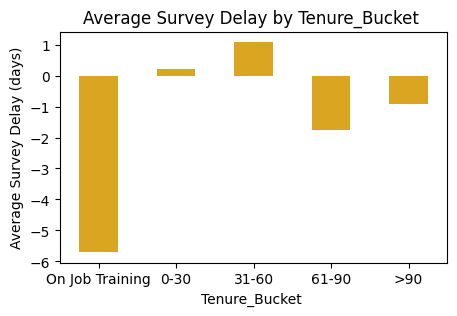

In [40]:
plt.figure(figsize=(5, 3))
avg_survey_delay_by_tenure.plot(kind='bar', color='goldenrod')
plt.title("Average Survey Delay by Tenure_Bucket ")
plt.xlabel("Tenure_Bucket ")
plt.ylabel("Average Survey Delay (days)")
plt.xticks(rotation=0)
plt.show()

#### 9. Distribution of response times


In [30]:
response_time_distribution = df["response_time"].describe()
print(response_time_distribution)

count    5.784000e+03
mean    -1.020223e+04
std      2.411760e+06
min     -1.771188e+07
25%      1.200000e+02
50%      4.200000e+02
75%      6.180000e+03
max      1.062360e+07
Name: response_time, dtype: float64


#### 10. Relationship between item price and CSAT score


In [31]:
correlation_price_csat = df["Item_price"].corr(df["CSAT_Score"])
print(correlation_price_csat)


-0.17758205950804176


#### 11. CSAT scores by sub-category


In [32]:
csat_by_sub_category = df.groupby("Sub-category")["CSAT_Score"].mean().head(5)
print(csat_by_sub_category)

Sub-category
Affiliate Offers      3.333333
COD Refund Details    1.000000
Call back request     4.000000
Call disconnected     2.000000
Card/EMI              1.000000
Name: CSAT_Score, dtype: float64


C:\Users\saran\AppData\Local\Temp\ipykernel_10696\3080674987.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  csat_by_sub_category = df.groupby("Sub-category")["CSAT_Score"].mean().head(5)


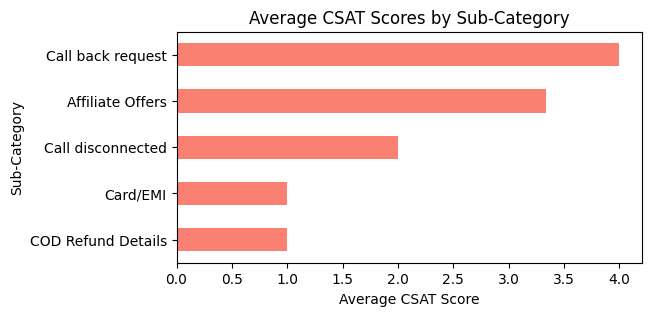

In [33]:
plt.figure(figsize=(6,3))
csat_by_sub_category.sort_values().plot(kind='barh', color='salmon')
plt.title("Average CSAT Scores by Sub-Category")
plt.xlabel("Average CSAT Score")
plt.ylabel("Sub-Category")
plt.show()

#### 12. Count of orders with missing order date


In [34]:
missing_order_dates = df["order_date_time"].isnull().sum()
print(missing_order_dates)


0


#### 13. Issues by tenure bucket


In [35]:
issues_by_tenure = df["Tenure_Bucket"].value_counts()
print(issues_by_tenure)

Tenure_Bucket
>90                2049
On Job Training    1466
31-60               905
0-30                859
61-90               505
Name: count, dtype: int64


#### 14. Most common supervisors handling issues


In [36]:
top_supervisors = df["Supervisor"].value_counts().head(5)
print(top_supervisors)

Supervisor
Carter Park         318
Noah Patel          265
Elijah Yamaguchi    259
Zoe Yamamoto        244
Emma Park           240
Name: count, dtype: Int64


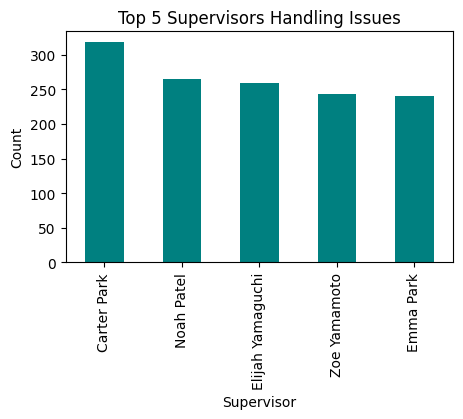

In [37]:
plt.figure(figsize=(5,3))
top_supervisors.plot(kind='bar', color='teal')
plt.title("Top 5 Supervisors Handling Issues")
plt.xlabel("Supervisor")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

#### 15. Agent performance: average CSAT by agent

In [38]:
avg_csat_by_agent = df.groupby("Agent_name")["CSAT_Score"].mean().sort_values(ascending=False).head(5)
print(avg_csat_by_agent)

Agent_name
Abigail Gonzalez     5.0
Whitney Cross DVM    5.0
Wanda Kelly          5.0
Virginia Lane        5.0
Virginia Diaz        5.0
Name: CSAT_Score, dtype: float64


## Summary

##### This project aimed to study a Customer Support Dataset that includes different details about how customers interact with the support team. The dataset features information on customer problems, agent effectiveness, and satisfaction ratings from various communication methods like phone, email, and chat.

##### The main goal of this analysis was to uncover what affects customer satisfaction and to find any issues that slow down service efficiency. By analyzing customer behavior and assessing agent performance, companies can develop strategies to improve the customer experience and make support processes more efficient.

## Findings

##### Communication methods such as Email and Chat showed slower response times than Phone, suggesting possible delays in non-instant communication. Quicker responses were usually linked to greater customer satisfaction, highlighting the need for prompt support.

##### Agents who have been with the company longer and those on the evening shift performed better in response time and customer satisfaction scores. Some agents regularly achieved high customer satisfaction scores, indicating that their techniques could serve as a standard for training other agents.



## Suggesions

#####  1. Aim to shorten response times, especially for email and chat, by adding more resources or using automated tools.
#####  2. Use knowledge from successful agents to create focused training programs for new or struggling agents.
#####  3. Some product categories, especially expensive items, showed notable delays. This might need extra checks or higher-level support.
#####  4. Use active communication methods for important problems or delays to set customer expectations and boost satisfaction.


### Businesses can use the knowledge gained from this project to boost their customer support, improve service quality, and build better relationships with customers.